In [86]:
import numpy as np
import datetime as dt
import numpy as np
import geopandas as gpd
import datetime as dt
import csv
import matplotlib.colors as clrs
import matplotlib.pyplot as plt

WindKiteTrsData=np.load('../PreprocessedData.npz',allow_pickle=True)


WindEnergy=WindKiteTrsData['WindEnergy']
WindLatLong=WindKiteTrsData['WindLatLong']

#Kite Data
KiteEnergy=WindKiteTrsData['KiteEnergy']
KiteEnergy_LF_OUTPUT=WindKiteTrsData['Power_LF_AVG']

KiteLatLong=WindKiteTrsData['KiteLatLong']

TimeStepHours=WindKiteTrsData['TimeStepHours'] #Number of hours for each time step

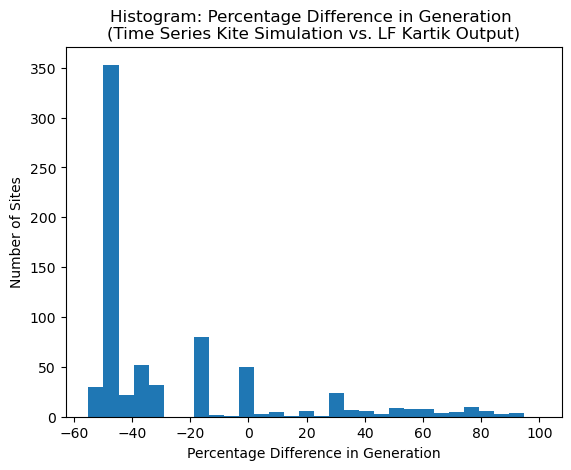

In [87]:
PercentageDiff_Generation=(KiteEnergy.mean(axis=1)-KiteEnergy_LF_OUTPUT)/KiteEnergy_LF_OUTPUT*100
plt.hist(PercentageDiff_Generation, bins=30,range=[-55,100])  # density=False would make counts

plt.ylabel("Number of Sites")
plt.xlabel("Percentage Difference in Generation")
plt.title("Histogram: Percentage Difference in Generation \n(Time Series Kite Simulation vs. LF Kartik Output)");


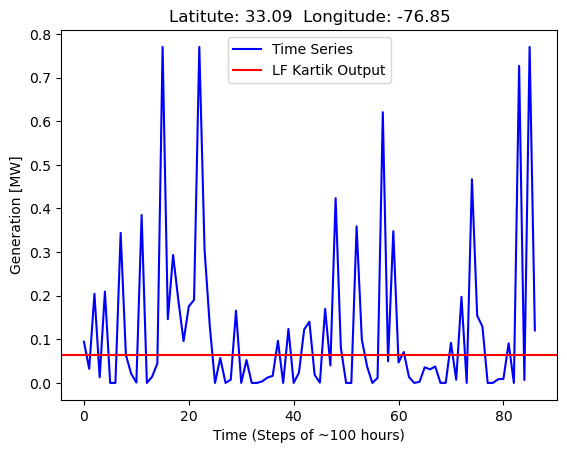

In [61]:
#Index=708
Index=15

plt.plot(KiteEnergy[Index,:],color="blue",label='Time Series')
plt.axhline(KiteEnergy_LF_OUTPUT[Index],color="red",label='LF Kartik Output')
plt.ylabel("Generation [MW]")
plt.xlabel("Time (Steps of ~100 hours)")
plt.title("Latitute: %.2f  Longitude: %.2f"%(KiteLatLong[Index,0],KiteLatLong[Index,1]));
plt.legend()

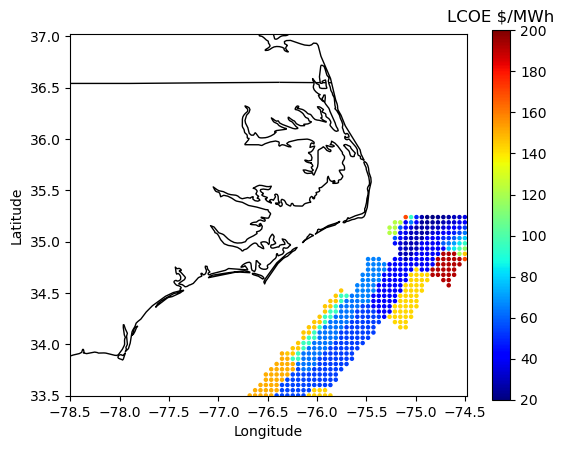

In [90]:
ShapeFileCoast="../GEO_data/ne_10m_coastline.shp"
ShapeFileStates="../GEO_data/ne_10m_admin_1_states_provinces_lines.shp"
Variable=WindKiteTrsData["AnnualizedCostKite"]/(WindKiteTrsData["Power_LF_AVG"]*24*365)
#Variable=WindKiteTrsData["AnnualizedCostKite"]/(WindKiteTrsData["KiteEnergy"].mean(axis=1)*24*365)

min_longitude=-78.5
max_longitude=-74.5+1/50

min_latitude=33.5 
max_latitude=37+1/50

xlim =[min_longitude,max_longitude]
ylim=[min_latitude, max_latitude]


df = gpd.read_file(ShapeFileCoast)
df1 = gpd.read_file(ShapeFileStates)

fig, ax = plt.subplots(figsize  = None)
df.plot(color='black',linewidth=1,ax=ax)
df1.plot(color='black',linewidth=1,ax=ax)
Y_LONG=WindKiteTrsData["KiteLatLong"][:,1]
X_LAT=WindKiteTrsData["KiteLatLong"][:,0]
plt.scatter(Y_LONG,X_LAT,c=Variable, s=5, cmap='jet')


ticks = np.linspace(Variable.min(), Variable.max(), 10, endpoint=True)
#ticks = np.linspace(Variable.min(), 200, 10, endpoint=True)
clb=plt.colorbar(format='%.f', ticks=ticks)


plt.xlabel("Longitude")
plt.ylabel("Latitude")

clb.ax.set_title('LCOE $/MWh')


ax.set_xlim(xlim)
ax.set_ylim(ylim)

plt.savefig("mWing_KiteSeabed.png",bbox_inches='tight',dpi=700)


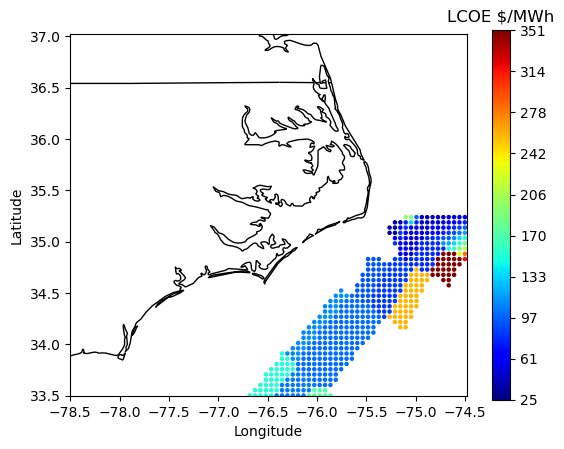

In [91]:
ShapeFileCoast="../GEO_data/ne_10m_coastline.shp"
ShapeFileStates="../GEO_data/ne_10m_admin_1_states_provinces_lines.shp"
Variable=WindKiteTrsData["AnnualizedCostKite"]/(WindKiteTrsData["Power_LF_AVG"]*24*365)
Variable=WindKiteTrsData["AnnualizedCostKite"]/(WindKiteTrsData["KiteEnergy"].mean(axis=1)*24*365)

min_longitude=-78.5
max_longitude=-74.5+1/50

min_latitude=33.5 
max_latitude=37+1/50

xlim =[min_longitude,max_longitude]
ylim=[min_latitude, max_latitude]


df = gpd.read_file(ShapeFileCoast)
df1 = gpd.read_file(ShapeFileStates)

fig, ax = plt.subplots(figsize  = None)
df.plot(color='black',linewidth=1,ax=ax)
df1.plot(color='black',linewidth=1,ax=ax)
Y_LONG=WindKiteTrsData["KiteLatLong"][:,1]
X_LAT=WindKiteTrsData["KiteLatLong"][:,0]
plt.scatter(Y_LONG,X_LAT,c=Variable, s=5, cmap='jet')


ticks = np.linspace(Variable.min(), Variable.max(), 10, endpoint=True)
#ticks = np.linspace(Variable.min(), 200, 10, endpoint=True)
clb=plt.colorbar(format='%.f', ticks=ticks)


plt.xlabel("Longitude")
plt.ylabel("Latitude")

clb.ax.set_title('LCOE $/MWh')


ax.set_xlim(xlim)
ax.set_ylim(ylim)

plt.savefig("mWing_KiteSeabed.png",bbox_inches='tight',dpi=700)
